In [60]:
import mlflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score,log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

In [61]:
#import data
data_df= pd.read_csv('train1.csv')
data_df.head()


,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,8
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,4
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,8
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,8
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,8


In [62]:
data_df.shape

(59255, 126)

In [63]:
data_df.columns.values

array(['Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age',
       'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_2',
       'Employment_Info_3', 'Employment_Info_4', 'Employment_Info_5',
       'Employment_Info_6', 'InsuredInfo_1', 'InsuredInfo_2',
       'InsuredInfo_3', 'InsuredInfo_4', 'InsuredInfo_5', 'InsuredInfo_6',
       'InsuredInfo_7', 'Insurance_History_1', 'Insurance_History_2',
       'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_10', 'Medical_History_11', 'Medical_H

In [64]:
#data_df=data_df.drop(labels='Id',axis=1)

In [65]:
data_df['Response'].value_counts()

8    19433
6    11211
7     8005
2     6545
1     6200
5     5424
4     1425
3     1012
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

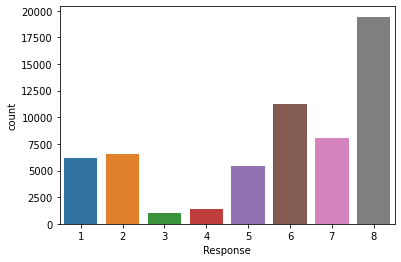

In [66]:
#churn plot
sns.countplot(x=data_df['Response'])

<AxesSubplot:xlabel='Modified_Response', ylabel='count'>

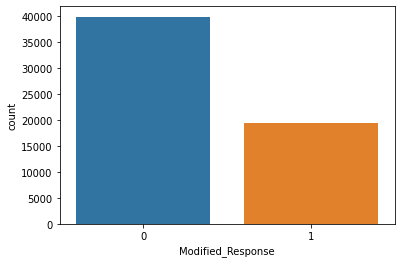

In [67]:
data_df['Modified_Response']  = data_df['Response'].apply(lambda x : 0 if x<=7 and x>=0 else (1 if x==8 else -1))
sns.countplot(x= data_df['Modified_Response'])


In [68]:
data_df['Modified_Response'].value_counts()

0    39822
1    19433
Name: Modified_Response, dtype: int64

In [69]:
# I just checked correlated feature with greater than .8 here 
corr = data_df.corr()
corr_greater_than_80 = corr[corr>=.8]
corr_greater_than_80

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Modified_Response
Product_Info_1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Info_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Medical_Keyword_46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Medical_Keyword_47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Medical_Keyword_48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Response,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


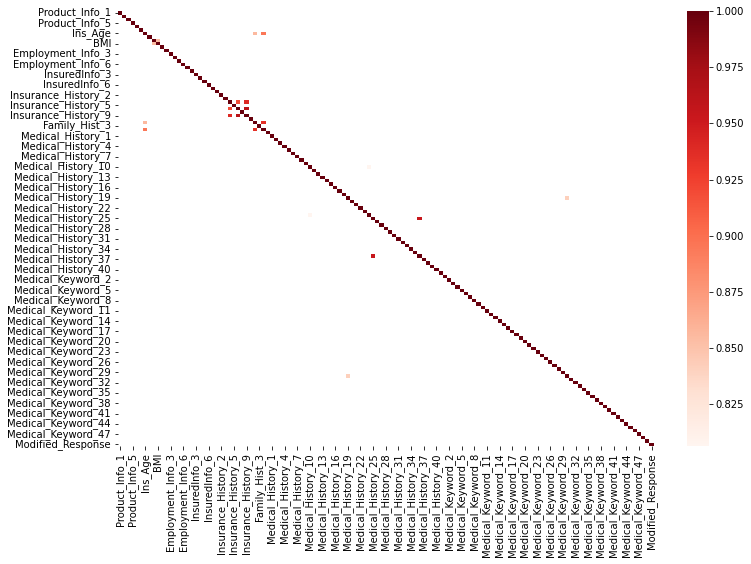

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

In [71]:
#no need for changes as they don't get affected by correlation much because of their non parametric nature

In [72]:
# Dropping old response columns
data_df.drop('Response',axis = 1, inplace=True)

In [73]:
missing_val_count_by_column = data_df.isna().sum()/len(data_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990600
Medical_History_32     0.981335
Medical_History_24     0.935955
Medical_History_15     0.750823
Family_Hist_5          0.703957
Family_Hist_3          0.576356
Family_Hist_2          0.482879
Insurance_History_5    0.427677
dtype: float64


In [74]:
#drop data contain >=40% of null data
data_df = data_df.dropna(thresh=data_df.shape[0]*0.4,how='all',axis=1)

In [75]:
#drop product_info_2 does not give out important information 
#data_df.drop('Product_Info_2',axis=1,inplace=True)

In [76]:
#fill out missing value
data_df= data_df.fillna(data_df.mean())

In [77]:
data_np=data_df.to_numpy(dtype=float)
print(data_np)

[[ 1.         10.          0.07692308 ...  0.          0.
   1.        ]
 [ 1.         26.          0.07692308 ...  0.          0.
   0.        ]
 [ 1.         26.          0.07692308 ...  0.          0.
   1.        ]
 ...
 [ 1.         26.          0.07692308 ...  0.          0.
   1.        ]
 [ 1.         10.          0.23076923 ...  0.          0.
   1.        ]
 [ 1.         26.          0.07692308 ...  0.          0.
   0.        ]]


In [78]:
#split data and train test split
X= data_np[:,:-1]
Y=data_np[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=1)


In [79]:
np.shape(X_test)

(14814, 120)

In [80]:
np.shape(Y_test)

(14814,)

In [81]:
def check_scores(model, X_train, X_test):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds)
  test_auc = roc_auc_score(Y_test,test_preds)

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds)
  precision = precision_score(Y_test, test_class_preds)
  recall = recall_score(Y_test, test_class_preds) 
  
  
  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)



In [82]:
#grid search
def grid_search(model, parameters, X_train, Y_train):
      #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=3, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model


In [83]:
#Multi layer perceptron (Neural network)
mlp=MLPClassifier(random_state=0).fit(X_train, Y_train)
X_test_1d=mlp.predict(X_test)

In [84]:
print(classification_report(Y_test,X_test_1d))
accuracy_score(X_test_1d,Y_test)


              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      9992
         1.0       0.65      0.80      0.72      4822

    accuracy                           0.80     14814
   macro avg       0.77      0.80      0.78     14814
weighted avg       0.81      0.80      0.80     14814



0.7970838396111786

In [85]:
check_scores(mlp,X_train,X_test)

The accuracy on train dataset is 0.8057874485272608
The accuracy on test dataset is 0.7970838396111786

Train confusion matrix:
[[23928  5902]
 [ 2729 11882]]

Test confusion matrix:
[[7964 2028]
 [ 978 3844]]

ROC on train data: 0.8871892231783726
ROC on test data: 0.8783095327361017

Train log loss: 0.40778921201308804
Test log loss: 0.4209994006672353

F score is: 0.7189077987656631
Precision is: 0.6546321525885559
Recall is: 0.7971795935296557


In [86]:
#logistic regression
log=LogisticRegression(random_state=0).fit(X_train,Y_train)
log_X_test_1d=log.predict(X_test)

c:\Users\dangh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
print(classification_report(Y_test,log_X_test_1d))
accuracy_score(log_X_test_1d,Y_test)

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      9992
         1.0       0.64      0.57      0.60      4822

    accuracy                           0.76     14814
   macro avg       0.72      0.71      0.71     14814
weighted avg       0.75      0.76      0.75     14814



0.7558390711489132

In [88]:
check_scores(log,X_train,X_test)

The accuracy on train dataset is 0.754866002115164
The accuracy on test dataset is 0.7558390711489132

Train confusion matrix:
[[25200  4630]
 [ 6264  8347]]

Test confusion matrix:
[[8444 1548]
 [2069 2753]]

ROC on train data: 0.8179795871997303
ROC on test data: 0.8186754090124029

Train log loss: 0.48358276363545794
Test log loss: 0.4816554065246687

F score is: 0.603529540721254
Precision is: 0.6400837014647757
Recall is: 0.57092492741601


In [89]:
#Random Forest (default)
forest= RandomForestClassifier(random_state=0).fit(X_train,Y_train)
predict_forest=log.predict(X_test)
print(classification_report(Y_test,predict_forest))
accuracy_score(predict_forest,Y_test)

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      9992
         1.0       0.64      0.57      0.60      4822

    accuracy                           0.76     14814
   macro avg       0.72      0.71      0.71     14814
weighted avg       0.75      0.76      0.75     14814



0.7558390711489132

In [90]:
check_scores(forest,X_train,X_test)

The accuracy on train dataset is 0.9999774982561148
The accuracy on test dataset is 0.8282705548805185

Train confusion matrix:
[[29830     0]
 [    1 14610]]

Test confusion matrix:
[[8854 1138]
 [1406 3416]]

ROC on train data: 0.9999999942640307
ROC on test data: 0.9017502160168616

Train log loss: 0.10510480503641993
Test log loss: 0.37481802105883166

F score is: 0.7286689419795221
Precision is: 0.7501097935880544
Recall is: 0.7084197428452924


In [91]:
#Random Forest (finetune/optimal)
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [15,20],
}
grid_forest=grid_search(RandomForestClassifier(),param_grid,X_train,Y_train)
grid_forest_predict=grid_forest.predict(X_test)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ....max_depth=15, n_estimators=200;, score=0.896 total time=   7.0s
[CV 2/2] END ....max_depth=15, n_estimators=200;, score=0.899 total time=   6.5s
[CV 1/2] END ....max_depth=15, n_estimators=500;, score=0.896 total time=  14.6s
[CV 2/2] END ....max_depth=15, n_estimators=500;, score=0.900 total time=  14.4s
[CV 1/2] END ....max_depth=20, n_estimators=200;, score=0.898 total time=   6.7s
[CV 2/2] END ....max_depth=20, n_estimators=200;, score=0.901 total time=   6.8s
[CV 1/2] END ....max_depth=20, n_estimators=500;, score=0.898 total time=  16.9s
[CV 2/2] END ....max_depth=20, n_estimators=500;, score=0.902 total time=  17.1s


Best parameters are: 
{'max_depth': 20, 'n_estimators': 500}


In [92]:
print(classification_report(Y_test, grid_forest_predict))
accuracy_score(Y_test,grid_forest_predict)

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      9992
         1.0       0.74      0.72      0.73      4822

    accuracy                           0.83     14814
   macro avg       0.80      0.80      0.80     14814
weighted avg       0.83      0.83      0.83     14814



0.8275280140407723

In [93]:
check_scores(grid_forest,X_train,X_test)

The accuracy on train dataset is 0.9458608042123264
The accuracy on test dataset is 0.8275280140407723

Train confusion matrix:
[[28070  1760]
 [  646 13965]]

Test confusion matrix:
[[8778 1214]
 [1341 3481]]

ROC on train data: 0.986690845459612
ROC on test data: 0.9033595395603086

Train log loss: 0.23219589884453581
Test log loss: 0.3745793676905858

F score is: 0.7315330461279814
Precision is: 0.7414270500532482
Recall is: 0.7218996267109083


In [104]:
#XGBoost model
xgb=XGBClassifier(random_state=0).fit(X_train,Y_train)
xgb_predict=xgb.predict(X_test)
print(classification_report(Y_test, xgb_predict))
accuracy_score(Y_test,xgb_predict)

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      9992
         1.0       0.74      0.76      0.75      4822

    accuracy                           0.83     14814
   macro avg       0.81      0.81      0.81     14814
weighted avg       0.83      0.83      0.83     14814



0.8334683407587418

In [105]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [96]:
check_scores(xgb,X_train,X_test)

The accuracy on train dataset is 0.879975698116604
The accuracy on test dataset is 0.8334683407587418

Train confusion matrix:
[[26837  2993]
 [ 2341 12270]]

Test confusion matrix:
[[8694 1298]
 [1169 3653]]

ROC on train data: 0.9497554515397442
ROC on test data: 0.9071129570599658

Train log loss: 0.2768403802732812
Test log loss: 0.3573672937951125

F score is: 0.7475698352604114
Precision is: 0.7378307412643911
Recall is: 0.7575694732476151


In [97]:
#XGBoost (finetune/optimal)
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
xgb_optimal = grid_search(XGBClassifier(), xgb_parameters,X_train,Y_train)


Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.01, max_depth=1, n_estimators=2;, score=0.720 total time=   0.1s
[CV 2/2] END learning_rate=0.01, max_depth=1, n_estimators=2;, score=0.714 total time=   0.1s
[CV 1/2] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.720 total time=   0.1s
[CV 2/2] END learning_rate=0.01, max_depth=1, n_estimators=5;, score=0.714 total time=   0.1s
[CV 1/2] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.722 total time=   0.2s
[CV 2/2] END learning_rate=0.01, max_depth=1, n_estimators=10;, score=0.714 total time=   0.2s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=2;, score=0.841 total time=   0.1s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=2;, score=0.842 total time=   0.1s
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=5;, score=0.842 total time=   0.1s
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=5;, score=0.842 total time=   0.

In [98]:
xgb_optimal_predict=xgb_optimal.predict(X_test)
print(classification_report(Y_test, xgb_optimal_predict))
accuracy_score(Y_test,xgb_optimal_predict)


              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      9992
         1.0       0.72      0.77      0.74      4822

    accuracy                           0.83     14814
   macro avg       0.80      0.81      0.81     14814
weighted avg       0.83      0.83      0.83     14814



0.8265829620629135

In [99]:
xgb_optimal.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.5,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 10,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [100]:
check_scores(xgb_optimal,X_train,X_test)

The accuracy on train dataset is 0.8281316802052159
The accuracy on test dataset is 0.8265829620629135

Train confusion matrix:
[[25549  4281]
 [ 3357 11254]]

Test confusion matrix:
[[8553 1439]
 [1130 3692]]

ROC on train data: 0.9061471154969301
ROC on test data: 0.902220085898665

Train log loss: 0.3622204754425248
Test log loss: 0.36780529290295494

F score is: 0.7418868682809203
Precision is: 0.7195478464236991
Recall is: 0.7656574035669846


In [101]:
#Stacking Model
stack_classifier= StackingClassifier(classifiers =[xgb,log,grid_forest,mlp],meta_classifier=RandomForestClassifier(),use_probas=True, use_features_in_secondary=True)
stack_model=stack_classifier.fit(X_train,Y_train)

c:\Users\dangh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
stack_predict=stack_model.predict(X_test)
accuracy_score(Y_test,stack_predict)
print(classification_report(Y_test,stack_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      9992
         1.0       0.76      0.62      0.68      4822

    accuracy                           0.81     14814
   macro avg       0.80      0.76      0.78     14814
weighted avg       0.81      0.81      0.81     14814



In [103]:
check_scores(stack_model,X_train,X_test)

The accuracy on train dataset is 0.9999774982561148
The accuracy on test dataset is 0.8136222492237073

Train confusion matrix:
[[29829     1]
 [    0 14611]]

Test confusion matrix:
[[9073  919]
 [1842 2980]]

ROC on train data: 0.9999999942640307
ROC on test data: 0.8912094420455485

Train log loss: 0.018223087654703835
Test log loss: 0.7806477163071138

F score is: 0.6834078660704048
Precision is: 0.7642985380866889
Recall is: 0.6180008295313149
